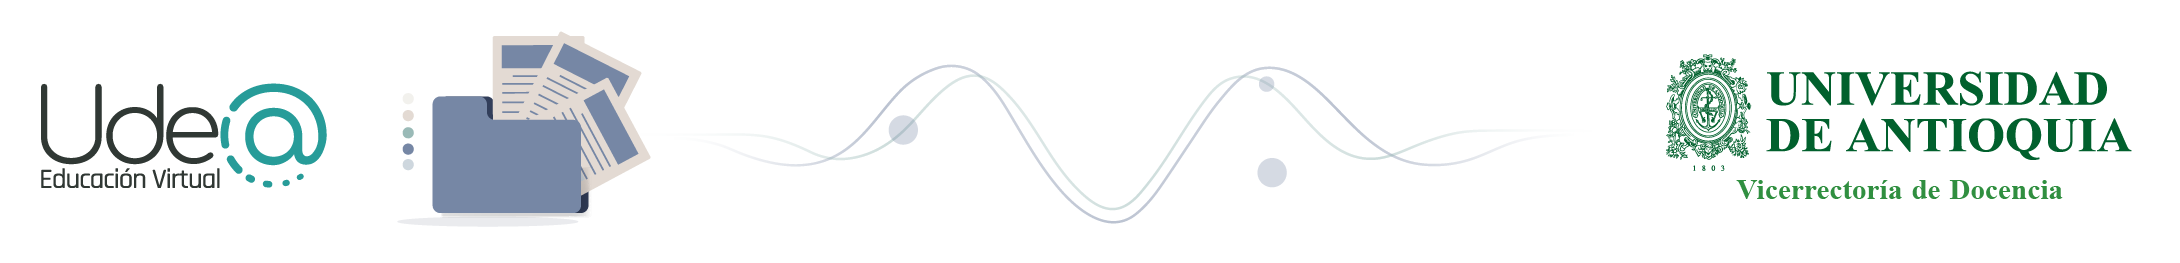

## Enventanado y segmentación

**Autor:** Hernán Felipe García Arias, PhD.,
Diana Patricia Tobón Vallejo, PhD.

Universidad de Antioquia


La creación de ventanas es un método clásico en el procesamiento de señales y se refiere a dividir la señal de entrada en segmentos temporales. Los bordes de los segmentos son entonces visibles como discontinuidades, que son incongruentes con la señal del mundo real. Para reducir el impacto de la segmentación en las propiedades estadísticas de la señal, aplicamos ventanas a los segmentos temporales. Las funciones de ventana son funciones suaves que van a cero en los bordes. Además, al multiplicar la señal de entrada con una función de ventana, la función de ventana también llega a cero en el borde, de modo que la discontinuidad en el borde se vuelve invisible. Por lo tanto, la ventana cambia la señal, pero el cambio está diseñado de tal manera que se minimiza su efecto en las estadísticas de la señal.

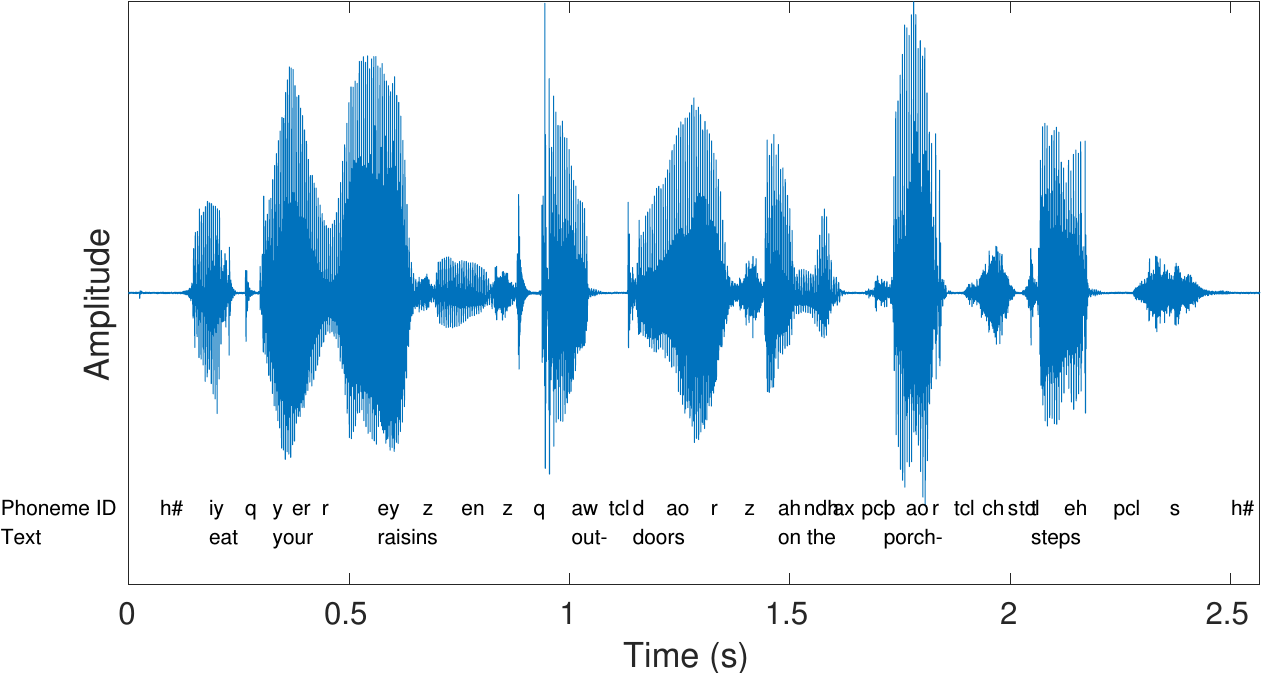


Fuente: https://wiki.aalto.fi/download/attachments/148294912/sample_sentence-1.png?version=1&modificationDate=1552659089307&api=v2

Debemos tener en cuenta que existen dos aplicaciones distintas de ventanas con diferentes requisitos:
1. **Análisis:** en el análisis, solo nos preocupamos por extraer información con la mayor precisión posible dadas las limitaciones computacionales.
2. **Procesamiento:** mientras que en las aplicaciones de procesamiento, además, necesitamos la capacidad de recrear la señal a partir de una secuencia de ventanas.

A continuación, se muestran algunas de las ventanas mas utilizadas en el procesamiento de señales.

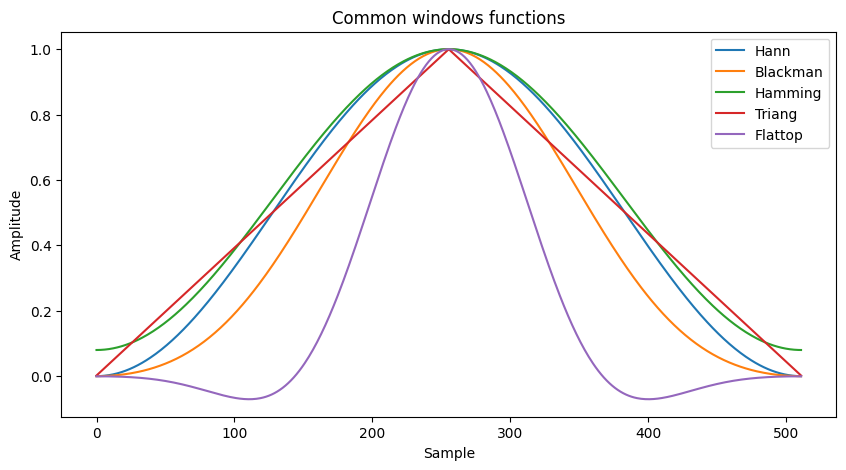

In [17]:
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt

L = 512 # Número de puntos de ventana

plt.plot(signal.windows.hann(L))
plt.plot(signal.windows.blackman(L))
plt.plot(signal.windows.hamming(L))
plt.plot(signal.windows.triang(L))
plt.plot(signal.windows.flattop(L))

plt.title("Common windows functions")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.legend(('Hann','Blackman','Hamming','Triang','Flattop'))
plt.show()

En la figura anterior podemos observar que diferentes tipos de funciones de ventana, evidencian factores diferentes de comportamiento para los cuales la señal será codificada.

## Funciones de ventana

En el procesamiento digital de señales, a menudo se utilizan diferentes funciones de ventana ([windows](https://youtu.be/Q8N8pZ8P3f4)) para el análisis espectral. Las propiedades resultantes dependen del espectro $W(\mathrm{e}^{\,\mathrm{j}\, \Omega})$ de la función de ventana. Esto se debe a que el espectro de la señal enventanada está dado por una convolución periódica $X_N(\mathrm{e}^{\,\mathrm{j}\, \Omega}) = \frac{1}{2 \pi} X(\mathrm{e}^{\,\mathrm{j}\, \Omega}) \circledast W(\mathrm{e}^{\,\mathrm{j}\, \Omega})$. Dada una señal exponencial $x[k] = \mathrm{e}^{\mathrm{j} \Omega_0 k}$, esta operación derivará en un desplazamiento cíclico del espectro de la función de ventana $W(\mathrm{e}^{\,\mathrm{j}\, \Omega})$ by $\Omega_0$.

Es importante que tengas en cuenta que, diferentes funciones de ventana tienen diferentes propiedades. Por ejemplo, con respecto a la capacidad de distinguir dos señales vecinas (resolución de frecuencia) o de detectar dos señales cuando una es mucho más débil (nivel de lóbulo lateral). Dado que estos dos aspectos se contrarrestan con las funciones típicas de la ventana, la elección de una ventana adecuada depende en gran medida de la aplicación. En primer lugar, se analizan las funciones de ventana que se aplican con frecuencia y sus propiedades espectrales. Luego, analizaremos las funciones de la ventana que se comparan mediante métricas de evaluación de uso común.

Con el fin de estudiar las propiedades del enventanamiento, a continuación creamos una función que calcula y grafica la magnitud del espectro dada una función de ventana. Para ellos, aproximaremos numéricamente la transformada de Fourier de tiempo-discreto (DTFT) $W(\mathrm{e}^{\,\mathrm{j}\, \Omega})$ a partir de la DFT.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig


def dft_window_function(w):
    '''Calculates and plots the magnitude spectrum of a window function.'''
    N = len(w)

    # DFT of window function
    W = np.fft.fft(w, 8192)
    W = np.fft.fftshift(W)
    W = W / np.amax(W) + np.nextafter(0, 1)
    mu = np.linspace(-np.pi, np.pi, 8192)

    # plot window function and its spectrum
    plt.rcParams['figure.figsize'] = 10, 5
    plt.stem(w, basefmt=' ', use_line_collection=True)
    plt.xlabel(r'$k$')
    plt.ylabel(r'$w[k]$')
    plt.axis([-1, N+1, -0.1, 1.1])
    plt.grid()

    plt.figure()
    plt.plot(mu, 20*np.log10(np.abs(W)))
    plt.xlabel(r'$\Omega$')
    plt.ylabel(r'$| W(e^{j \Omega}) |$ in dB')
    plt.axis([-np.pi, np.pi, -100, 5])
    plt.grid()

### Ventana rectangular

La [ventana rectangular](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.boxcar.html#scipy.signal.windows.boxcar) $w[k] = \text{rect}_N[k]$ tiene en cuenta todas las muestras con el mismo peso. El lóbulo principal de su espectro de magnitud es estrecho, pero el nivel de los lóbulos laterales es bastante alto. Tiene la selectividad de frecuencia más alta.

<ipython-input-18-964f33726f95>:18: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, basefmt=' ', use_line_collection=True)


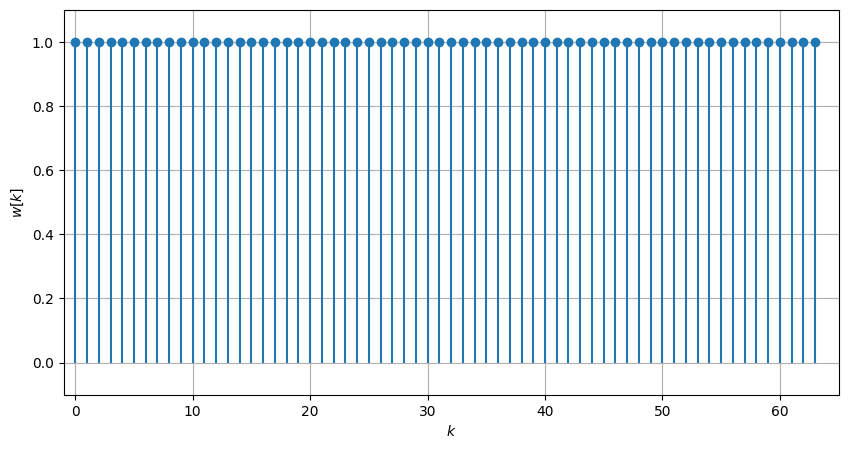

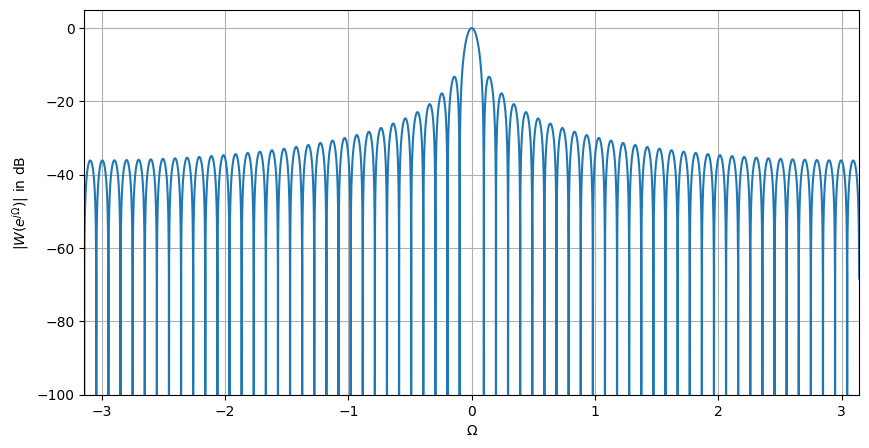

In [19]:
dft_window_function(np.ones(64))

### Ventana triangular

Para una longitud de ventana impar $2N - 1$, la [ventana window](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.triang.html#scipy.signal.windows.triang) puede ser expresada como la convolución de dos ventanas rectangulares $w[k] = \text{rect}_N[k] * \text{rect}_N[k]$. El lóbulo principal es más ancho que el de la ventana rectangular, pero el nivel de los lóbulos laterales decae más rápido.

<ipython-input-18-964f33726f95>:18: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, basefmt=' ', use_line_collection=True)


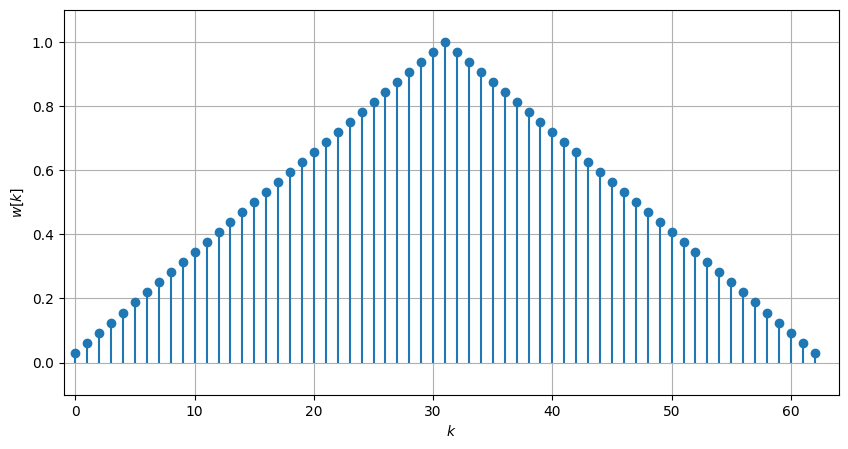

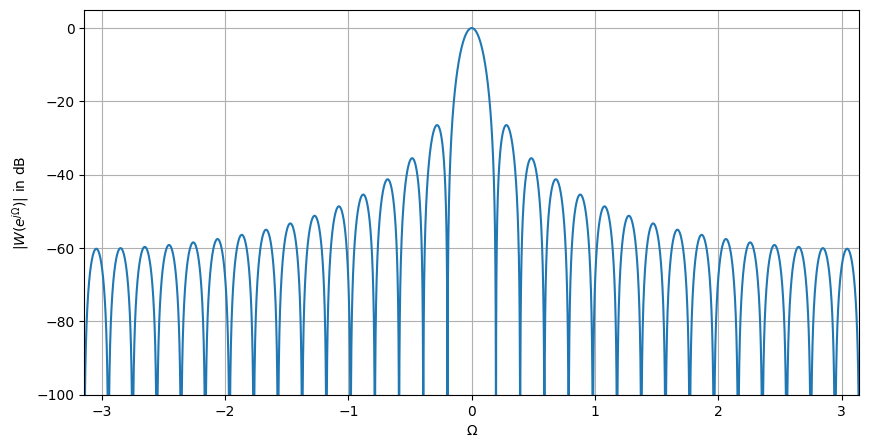

In [21]:
dft_window_function(sig.windows.triang(63))

### Ventana de Hann

La [ventana de Hann](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.hann.html#scipy.signal.windows.hann) o hanning $w[k] = \frac{1}{2} ( 1 - \cos(2 \pi \frac{k}{N}))$ es una ventana suave cuyo primer y último valor es cero. Presenta una rápida descomposición de los lóbulos laterales.

<ipython-input-18-964f33726f95>:18: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, basefmt=' ', use_line_collection=True)


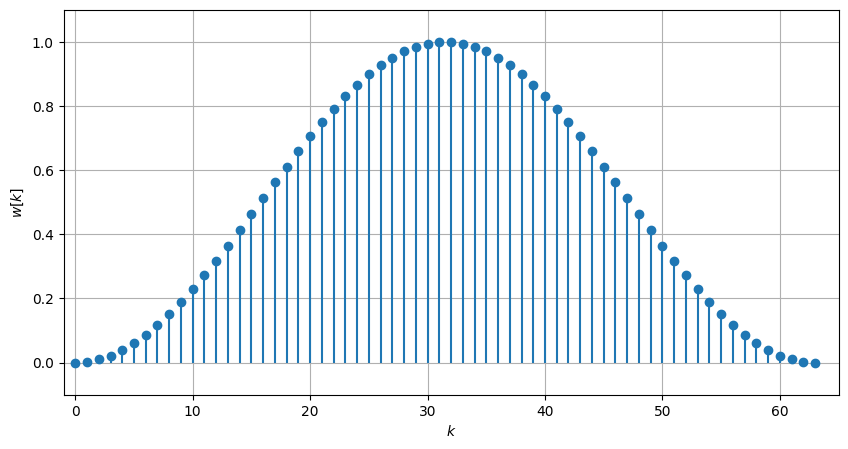

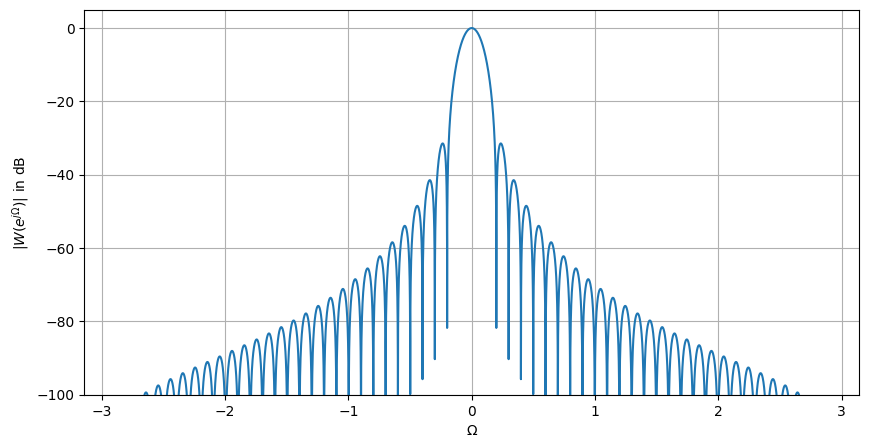

In [22]:
dft_window_function(np.hanning(64))

### Ventana de Hamming

La [ventana de Hamming](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.general_hamming.html#scipy.signal.windows.general_hamming) $w[k] =  0.54 - 0.46 \cos(2 \pi \frac{k}{N})$ es una función de ventana suave cuyo primer y último valor no es cero. El nivel de los lóbulos laterales es aproximadamente constante.

<ipython-input-18-964f33726f95>:18: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, basefmt=' ', use_line_collection=True)


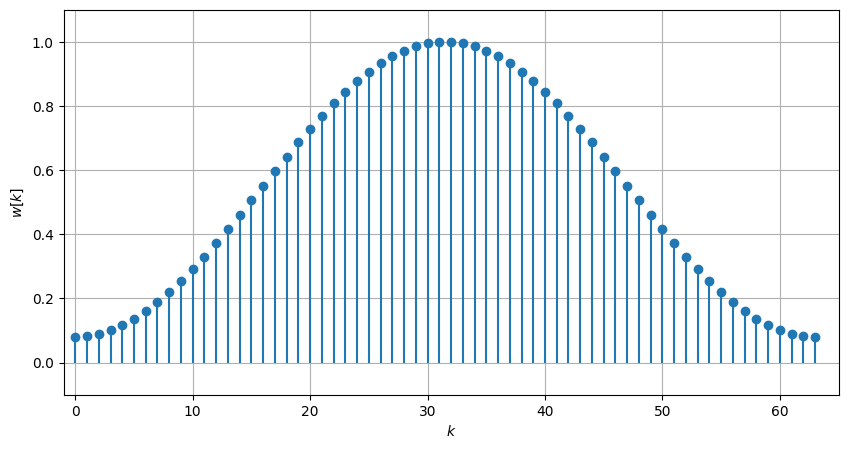

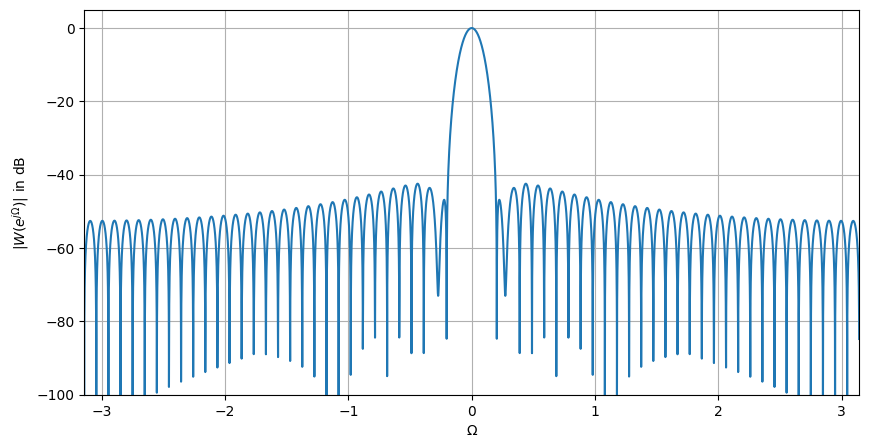

In [23]:
dft_window_function(np.hamming(64))

# Ventana de Blackman

La [ventana de Blackman](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.blackman.html#scipy.signal.windows.blackman) $w[k] =  0.42 - 0.5 \cos(2 \pi \frac{k}{N}) + 0.08 \cos(4 \pi \frac{k}{N})$presenta una rápida descomposición de los lóbulos laterales a costa de un lóbulo principal ancho y selectividad de baja frecuencia.

<ipython-input-18-964f33726f95>:18: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w, basefmt=' ', use_line_collection=True)


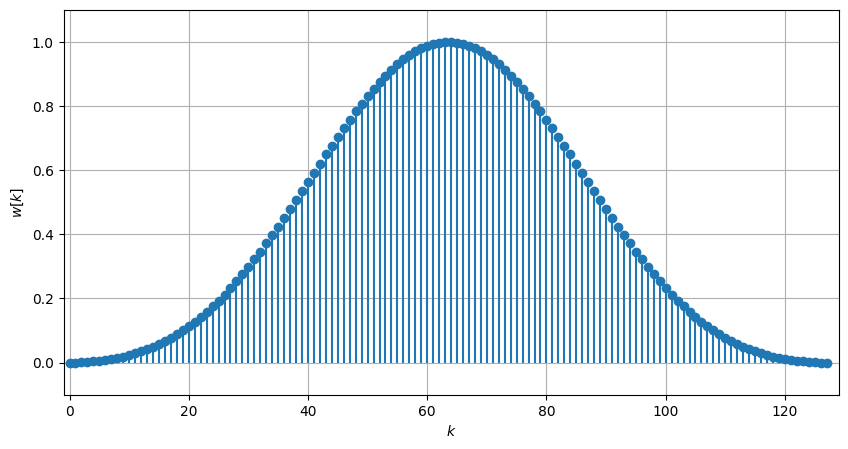

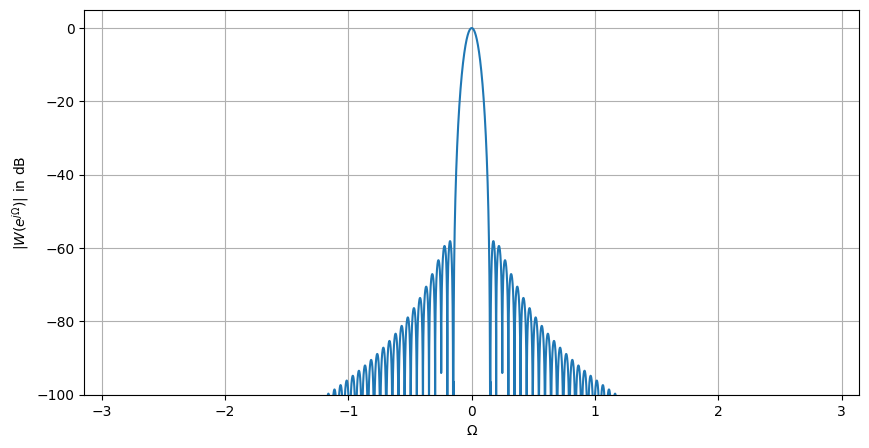

In [24]:
dft_window_function(np.blackman(128))

### Comparación entre las funciones de ventana

Además de inspeccionar la DTFT de las funciones de ventana, también se utilizan varias métricas de evaluación para la comparación o selección de funciones de ventana. Tres de las medidas más destacadas en el análisis espectral son:

1. **Ancho del lóbulo principal**: el ancho del lóbulo principal en términos de frecuencia normalizada se mide entre los dos puntos donde su valor máximo se reduce a la mitad ($-3dB$). Esta medida está ligada a la capacidad de detectar dos señales exponenciales con niveles comparables y frecuencias similares.

2. **Amplitud relativa de los lóbulos laterales**: relación en términos de amplitud entre el máximo del lóbulo principal y el nivel máximo de los lóbulos laterales. Esta medida está relacionada con el rendimiento de detección cuando están presentes dos o más señales exponenciales con niveles dispares y frecuencias diferentes.

3. **Error máximo de muestreo**: este error de amplitud máxima se presenta cuando el máximo del lóbulo principal no se alcanza al muestrear el espectro. Se define como la relación entre la amplitud del lóbulo principal y la amplitud en $\Omega = \frac{\pi}{N}$. Esta medida proporciona información sobre el máximo error posible al extraer la amplitud de las señales armónicas de su DFT.

La siguiente tabla muestra los valores de estas métricas para las funciones de ventana introducidas:

| Función de Ventana | Ancho del Lóbulo Principal | Nivel del lóbulo lateral | Error de muestreo |
|---|:---:|:---:|:---:|
| **rectangular** | $\frac{4 \pi}{N + 1}$ | - 13 dB | 3.92 dB |
| **triangular** | $\frac{8 \pi}{N}$ | - 25 dB | 1.82 dB |
| **Hann** | $\frac{8 \pi}{N}$ | - 31 dB | 1.42 dB |
| **Hamming**| $\frac{8 \pi}{N}$ | - 41 dB | 1.78 dB |
| **Blackman** | $\frac{12 \pi}{N}$ | - 57 dB | 1.10 dB |

Es evidente a partir de la tabla que un nivel de lóbulo lateral más bajo tiene como consecuencia un lóbulo principal más ancho.

### Análisis de mezclas de señales mediante la transformación de Fourier discreta con ventanas

El análisis de mezclas de señales por la ventana DFT se ilustra con ejemplos numéricos. Para este propósito, la función para el análisis de una se amplía creando una ventana señal antes de tomar su DFT.

In [41]:
def dft_signal_mixture_window(N, *, amp1, period1, amp2, period2, window):
    '''Calculates and plots the magnitude spectrum of two windowed superimposed exponentials.

    Keyword arguments:
    N: length of signal/DFT
    amp1, period1 : amplitude and periodicity of 1st complex exponential
    amp2, period2 : amplitude and periodicity of 2nd complex exponential
    '''

    # generate the signal mixture
    Om0_1 = period1 * (2*np.pi/N)  # frequency of 1st exponential signal
    Om0_2 = period2 * (2*np.pi/N)  # frequency of 2nd exponential signal
    k = np.arange(N)
    x = amp1 * np.exp(1j*Om0_1*k) + amp2 * np.exp(1j*Om0_2*k)
    x = x * window
    print(Om0_1)
    print(Om0_2)

    # DFT of the signal mixture
    mu = np.arange(N)
    X = np.fft.fft(x)

    # plot spectrum
    plt.figure(figsize = (10, 8))
    plt.stem(mu, abs(X), basefmt = ' ')
    plt.title(r'Absolute value of the DFT of a signal mixture')
    plt.xlabel(r'$\mu$')
    plt.ylabel(r'$|X[\mu]|$')
    plt.axis([0, N, -0.5, abs(X).max()+5])
    plt.grid()

Ahora, el último ejemplo se vuelve a investigar utilizando una ventana de Blackman que presenta una alta supresión de los lóbulos laterales.

2.0224002707484297
9.817477042468104


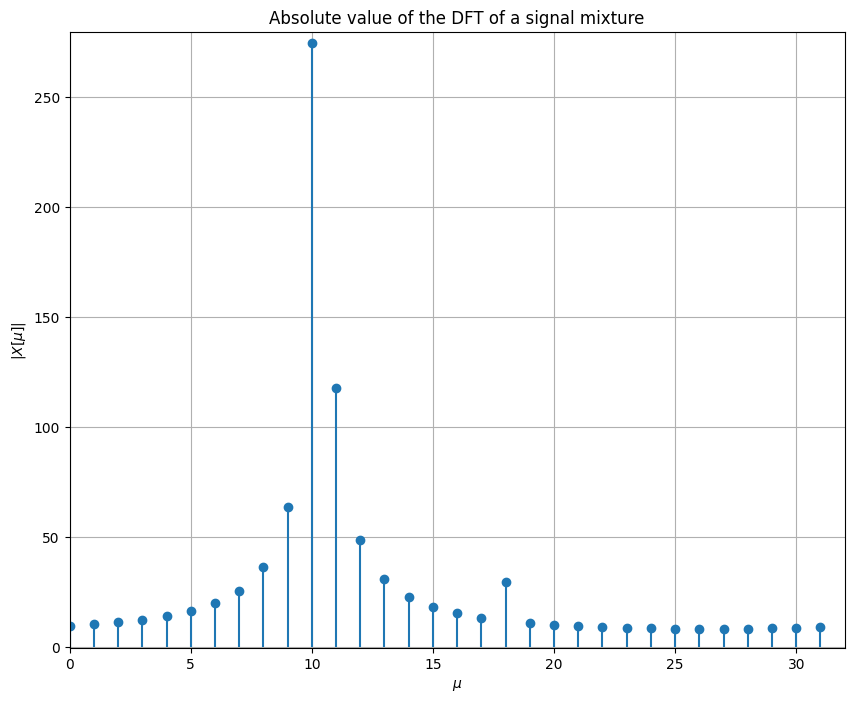

In [53]:
dft_signal_mixture_window(32, amp1=10, period1=10.3, amp2=0.8, period2=50, window=np.ones(32))  #amp1=1, period1=10.3, amp2=0.8, period2=14,,, amp1=10, period1=10.3, amp2=0.8, period2=50

La segunda señal exponencial con el nivel más bajo ahora se vuelve visible en el espectro.

**Pregunta final**

* Examina el efecto de las otras funciones de ventana para diferencias de frecuencia y nivel pequeñas/grandes. ¿Qué función de ventana es la más adecuada para qué situación?

**Respuesta:** la función de ventana rectangular es adecuada para identificar dos o más señales exponenciales con amplitudes comparables y solo diferencias menores en frecuencia. Esto se debe a su estrecho lóbulo principal. Además, las funciones de ventana que cuentan con un mayor decaimiento de los lóbulos laterales son muy adecuadas para la identificación de señales exponenciales con niveles y frecuencias bastante diferentes.

## References
* Oppenheim, A. V., and A. S. Willsky. Signals and Systems Prentice-Hall, (1997)
* Proakis, John G. Digital signal processing: principles algorithms and applications Pearson Education India, 2001.